## Task 1 - Data collection and preparation

In [67]:
import yfinance as yf
ticker_symbol = "^IXIC" #Chose NASDAQ as the major exchange to study
data = yf.download(ticker_symbol, start = "2017-01-01", end = "2022-01-01", period = "1d") #Chose 5 years data
data.to_csv("NASDAQ_Historical_Data.csv")
print("Data downloaded and saved as 'NASDAQ_Historical_Data.csv'")

[*********************100%***********************]  1 of 1 completed

Data downloaded and saved as 'NASDAQ_Historical_Data.csv'


In [6]:
import pandas as pd
df = pd.read_csv("NASDAQ_Historical_Data.csv")

## Task 2 - EDA

In [7]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,5429.080078125,5429.080078125,5452.56982421875,5397.990234375,5425.6201171875,1887670000
3,2017-01-04,5477.0,5477.0,5482.35009765625,5440.240234375,5440.91015625,1885490000
4,2017-01-05,5487.93994140625,5487.93994140625,5495.85009765625,5464.35986328125,5474.39013671875,1799170000


In [68]:
data = df.iloc[2:, 1:] # Removing unnecessary rows and columns and printing out information about the dataframe
df.info() # To check on the datatypes of the data we have
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1261 non-null   object
 1   Adj Close  1260 non-null   object
 2   Close      1260 non-null   object
 3   High       1260 non-null   object
 4   Low        1260 non-null   object
 5   Open       1260 non-null   object
 6   Volume     1260 non-null   object
 7   Time       1261 non-null   object
dtypes: object(8)
memory usage: 78.9+ KB


,Adj Close,Close,High,Low,Open,Volume,Time
2,5429.080078125,5429.080078125,5452.56982421875,5397.990234375,5425.6201171875,1887670000,2017-01-03
3,5477.0,5477.0,5482.35009765625,5440.240234375,5440.91015625,1885490000,2017-01-04
4,5487.93994140625,5487.93994140625,5495.85009765625,5464.35986328125,5474.39013671875,1799170000,2017-01-05
5,5521.06005859375,5521.06005859375,5536.52001953125,5482.81005859375,5499.080078125,1711870000,2017-01-06
6,5531.81982421875,5531.81982421875,5541.080078125,5517.14013671875,5527.580078125,1887740000,2017-01-09


In [69]:
data['Adj Close'] = data['Adj Close'].astype(float) # Fixing the data dtype of columns
data['Close'] = data['Close'].astype(float)
data['High'] = data['High'].astype(float)
data['Low'] = data['Low'].astype(float)
data['Open'] = data['Open'].astype(float)
data['Volume'] = data['Volume'].astype(float)
data.dropna() # Dropping columns if missing values present
data.describe() # Basic statictics

,Adj Close,Close,High,Low,Open,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,9239.498087,9239.498087,9294.546479,9173.621117,9237.713818,3.093700e+09
std,2991.346303,2991.346303,3009.726669,2968.296812,2991.781485,1.491517e+09
min,5429.080078,5429.080078,5452.569824,5397.990234,5425.620117,8.721100e+08
25%,7083.580078,7083.580078,7166.419922,7015.790039,7097.020020,1.994985e+09
50%,7972.470215,7972.470215,8010.580078,7917.729980,7984.149902,2.372320e+09
75%,11361.770020,11361.770020,11455.140137,11251.895020,11383.235352,4.104395e+09
max,16057.440430,16057.440430,16212.230469,16017.230469,16120.919922,1.162119e+10


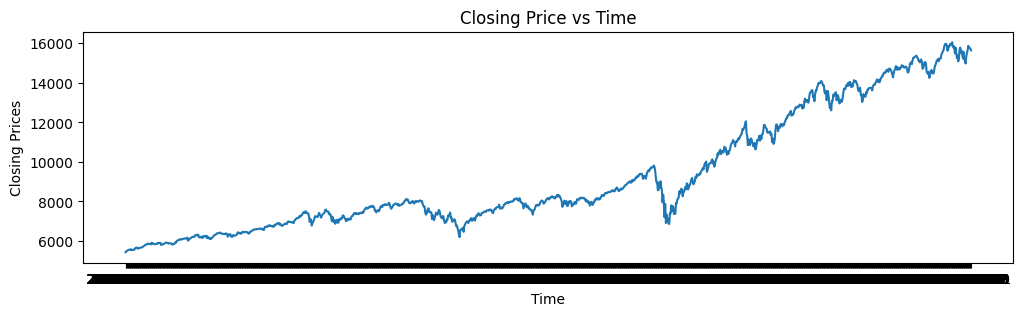

In [70]:
import matplotlib.pyplot as plt
# Plot of closing prices vs time
plt.figure(figsize=(12, 3)) 
plt.plot(data['Time'], data['Close'], label="Closing Prices")  

plt.xlabel("Time")
plt.ylabel("Closing Prices")
plt.title("Closing Price vs Time")
plt.show()


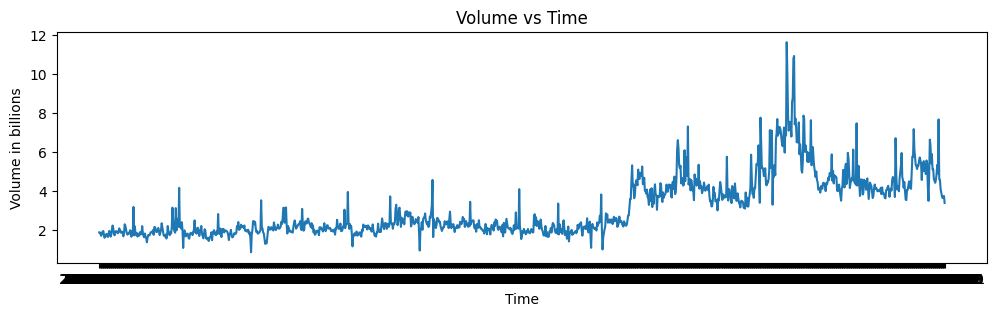

In [71]:
# Plot of trading volumes vs time
plt.figure(figsize=(12, 3))  
plt.plot(data['Time'], data['Volume'] / 1e9, label="Volume")  
plt.xlabel("Time")
plt.ylabel("Volume in billions")
plt.title("Volume vs Time")
plt.show()

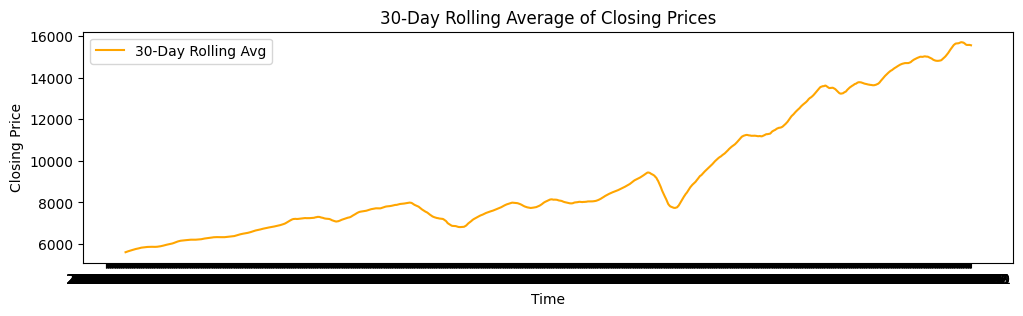

In [72]:
import matplotlib.pyplot as plt

# Calculate the 30-day rolling average for the 'Close' column
data['Close_Rolling_30'] = data['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 3))
plt.plot(data['Time'], data['Close_Rolling_30'], label="30-Day Rolling Avg", color='orange')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("30-Day Rolling Average of Closing Prices")
plt.legend()
plt.show()


## Task 3 - Time series Analysis

In [74]:
# This is to check for the seasonality by comparing yearly data(dates separated by exactly an year and comparing the data)
# Date was arbitrarily chosen as 3rd May. One date is missing mostly since it was dropped due to having some missing data during preprocessing
data["Time"] = pd.to_datetime(data["Time"])
filtered_data = data[(data["Time"].dt.month == 5) & (data["Time"].dt.day == 3)]
print(filtered_data)


         Adj Close         Close          High           Low          Open  \
85     6072.549805   6072.549805   6076.959961   6053.279785   6075.040039   
337    7088.149902   7088.149902   7112.589844   6991.140137   7065.029785   
588    8164.000000   8164.000000   8164.709961   8084.799805   8092.879883   
1091  13895.120117  13895.120117  14042.120117  13881.509766  14031.769531   

            Volume       Time  Close_Rolling_30  
85    2.152850e+09 2017-05-03       5916.598356  
337   2.355780e+09 2018-05-03       7082.937321  
588   2.081080e+09 2019-05-03       7938.578304  
1091  4.761430e+09 2021-05-03      13694.658919  


In [55]:
# Calculate percentage change in the 'Close' column
data['Pct_Change'] = data['Close'].pct_change() * 100
print(data[['Time', 'Close', 'Pct_Change']])


           Time         Close  Pct_Change
2    2017-01-03   5429.080078         NaN
3    2017-01-04   5477.000000    0.882653
4    2017-01-05   5487.939941    0.199743
5    2017-01-06   5521.060059    0.603507
6    2017-01-09   5531.819824    0.194886
...         ...           ...         ...
1256 2021-12-27  15871.259766    1.391966
1257 2021-12-28  15781.719727   -0.564165
1258 2021-12-29  15766.219727   -0.098215
1259 2021-12-30  15741.559570   -0.156411
1260 2021-12-31  15644.969727   -0.613598

[1259 rows x 3 columns]


## Task 4 - Reporting

Over the past five years, the closing prices have exhibited a general upward trend, rising steadily from 6000 to 16000. During periods of slower growth, the stock price continues to climb at a steady pace. However, when there is a sudden spike in price, it typically lasts for only a few days before experiencing a short-term dip, after which the price resumes its gradual ascent. The graph shows minor fluctuations or "noise," which can be smoothed out using a rolling average graph to analyze broader patterns. Notably, there is no visible seasonality in the data.

In terms of trading volumes, the initial trend shows relatively stable activity. However, in the last two years, trading volumes have significantly increased and now maintain a higher average level. This surge in trading volume aligns with a sharp price increase observed during the same period. Compared to closing prices, the volume data contains more noise, making it harder to interpret directly without smoothing. 

To support these observations, three key graphs were analyzed: closing price vs. time, a 30-day rolling average of closing prices vs. time, and trading volumes vs. time. These graphs provide a clearer understanding of the trends and patterns in the data.